In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch.nn as nn
import torch.nn.functional as F


mmtm = 0.5
class LeNet_BN(nn.Module):
    def __init__(self):
        super(LeNet_BN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1   = nn.BatchNorm2d(6, momentum = mmtm)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.bn2   = nn.BatchNorm2d(16, momentum = mmtm)
        self.conv3 = nn.Conv2d(16, 40, 3)
        self.bn3   = nn.BatchNorm2d(40, momentum = mmtm)
        self.conv4 = nn.Conv2d(40, 100, 3)
        self.bn4   = nn.BatchNorm2d(100, momentum = mmtm)
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(100 * 3 * 3, 320)
        self.bn5   = nn.BatchNorm1d(320, momentum = mmtm)
        self.fc2 = nn.Linear(320, 84)
        self.bn6   = nn.BatchNorm1d(84, momentum = mmtm)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(F.relu(self.bn1(x))) # 14
        x = self.conv2(x)
        x = F.relu(self.bn2(x)) # 12
        x = self.conv3(x)
        x = self.pool(F.relu(self.bn3(x))) # 5
        x = self.conv4(x)
        x = F.relu(self.bn4(x)) # 3
        x = x.view(-1, 100 * 3 * 3)
        
        x = self.fc1(x)
        x = F.relu(self.bn5(x))
        x = self.fc2(x)
        x = F.relu(self.bn6(x))
        x = self.fc3(x)
        return x

net_BN = LeNet_BN()
print (net_BN)

LeNet_BN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (conv3): Conv2d(16, 40, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(40, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (conv4): Conv2d(40, 100, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(100, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=900, out_features=320, bias=True)
  (bn5): BatchNorm1d(320, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=320, out_features=84, bias=True)
  (bn6): BatchNorm1d(84, eps=1e-05, momentum=0.5, affine=True, track_running_stats=True)
  (fc

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_BN.parameters(), lr=0.001, momentum=0.9)

Loss_train_BN = []
Loss_test_BN = []
Iter = 30
for epoch in range(Iter):  # loop over the dataset multiple times

    running_loss = 0.0
    train_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_BN(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        train_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss/1000))
            running_loss = 0.0
        if i == 4999:
            Loss_train_BN.append(train_loss/5000)
    for i, data in enumerate(testloader, 0):
        inputs, labels = data
        outputs = net_BN(inputs)
        loss_t = criterion(outputs, labels)
        test_loss += loss_t.item()
        if i % 1000 == 999:
            Loss_test_BN.append(test_loss/1000)
            test_loss = 0.0
print('Finished Training')

[1,  1000] loss: 1.952
[1,  2000] loss: 1.704
[1,  3000] loss: 1.623
[1,  4000] loss: 1.529
[1,  5000] loss: 1.487
[2,  1000] loss: 1.418
[2,  2000] loss: 1.375
[2,  3000] loss: 1.328
[2,  4000] loss: 1.323
[2,  5000] loss: 1.303
[3,  1000] loss: 1.230
[3,  2000] loss: 1.235
[3,  3000] loss: 1.225
[3,  4000] loss: 1.223
[3,  5000] loss: 1.193
[4,  1000] loss: 1.122
[4,  2000] loss: 1.121
[4,  3000] loss: 1.136
[4,  4000] loss: 1.144
[4,  5000] loss: 1.119
[5,  1000] loss: 1.056
[5,  2000] loss: 1.054
[5,  3000] loss: 1.057
[5,  4000] loss: 1.039
[5,  5000] loss: 1.045
[6,  1000] loss: 0.990
[6,  2000] loss: 0.998
[6,  3000] loss: 0.979
[6,  4000] loss: 0.993
[6,  5000] loss: 1.002
[7,  1000] loss: 0.910
[7,  2000] loss: 0.949
[7,  3000] loss: 0.961
[7,  4000] loss: 0.963
[7,  5000] loss: 0.961
[8,  1000] loss: 0.889
[8,  2000] loss: 0.897
[8,  3000] loss: 0.904
[8,  4000] loss: 0.889
[8,  5000] loss: 0.925
[9,  1000] loss: 0.826
[9,  2000] loss: 0.863
[9,  3000] loss: 0.875
[9,  4000] 

In [5]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_BN(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 64 %


In [6]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net_BN(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 67 %
Accuracy of   car : 74 %
Accuracy of  bird : 53 %
Accuracy of   cat : 49 %
Accuracy of  deer : 61 %
Accuracy of   dog : 45 %
Accuracy of  frog : 74 %
Accuracy of horse : 67 %
Accuracy of  ship : 79 %
Accuracy of truck : 72 %


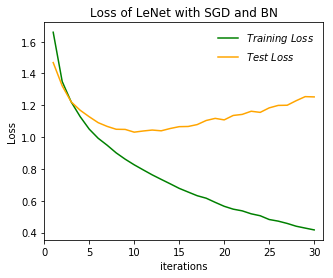

In [8]:
import numpy as np
import matplotlib.pyplot as plt

X_line = np.arange(1, Iter+1)

plt.figure(figsize = (5,4))
plt.plot(X_line, Loss_train_BN, color = 'green', label = r'$Training \ Loss$')
plt.plot(X_line, Loss_test_BN, color = 'orange', label = r'$Test \ Loss$')
plt.xlim([0, Iter+1])
plt.legend(loc='upper right',frameon=False) 
plt.xlabel('iterations')
plt.ylabel('Loss')
plt.title('Loss of LeNet with SGD and BN')
plt.show()